In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing / manipulation

# Machine Learning Models
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB

from sklearn.impute import SimpleImputer

# métricas
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score
from imblearn.under_sampling import RandomUnderSampler

# Dimensionality reduction
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


# Data Visualization
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import os
workdir_path = '/content/drive/MyDrive/datasets'
os.chdir(workdir_path)
!ls

AP_cap.png  AP_drop.png  boxplot_origin.png  csinascrj19.csv  sinascrj19.csv


In [4]:
sinasc = pd.read_csv('sinascrj19.csv')
print(sinasc.shape)

(207989, 61)


In [5]:
sinasc.head(10)

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,CODMUNRES,GESTACAO,GRAVIDEZ,PARTO,CONSULTAS,DTNASC,HORANASC,SEXO,APGAR1,APGAR5,RACACOR,PESO,IDANOMAL,DTCADASTRO,CODANOMAL,NUMEROLOTE,VERSAOSIST,DTRECEBIM,DIFDATA,DTRECORIGA,NATURALMAE,CODMUNNATU,CODUFNATU,ESCMAE2010,SERIESCMAE,DTNASCMAE,RACACORMAE,QTDGESTANT,QTDPARTNOR,QTDPARTCES,IDADEPAI,DTULTMENST,SEMAGESTAC,TPMETESTIM,CONSPRENAT,MESPRENAT,TPAPRESENT,STTRABPART,STCESPARTO,TPNASCASSI,TPFUNCRESP,TPDOCRESP,DTDECLARAC,ESCMAEAGR1,STDNEPIDEM,STDNNOVA,CODPAISRES,TPROBSON,PARIDADE,KOTELCHUCK,CONTADOR
0,1,2365146.0,220390,1,26,1.0,3.0,NaN,1.0,2.0,330455,5.0,1.0,1.0,4,19052019,2131.0,2,10.0,10.0,4.0,3790.0,2.0,27052019,NaN,20190028,3.2.01,10062019,22,NaN,833.0,330455.0,33.0,1.0,4.0,19121992.0,4.0,3.0,1.0,0.0,NaN,5082018.0,41.0,8.0,7.0,1.0,1.0,2.0,3.0,2.0,NaN,4.0,19052019.0,2.0,0,1,1,3,1,5,215113
1,1,2727064.0,221100,1,29,5.0,4.0,521110.0,0.0,0.0,330455,4.0,1.0,1.0,4,16032019,1840.0,1,9.0,10.0,4.0,3020.0,2.0,26032019,NaN,20190007,3.2.01,2042019,17,NaN,822.0,221100.0,22.0,3.0,NaN,15031990.0,4.0,0.0,0.0,0.0,NaN,5072018.0,36.0,8.0,8.0,2.0,1.0,2.0,3.0,1.0,1.0,2.0,16032019.0,12.0,0,1,1,10,0,5,232260
2,1,2561344.0,230500,1,27,5.0,3.0,999993.0,4.0,0.0,330455,5.0,1.0,1.0,4,5022019,2345.0,2,2.0,9.0,4.0,2445.0,2.0,20032019,NaN,20190006,3.2.00,21032019,44,NaN,823.0,230500.0,23.0,2.0,7.0,18021991.0,4.0,4.0,3.0,1.0,NaN,12052018.0,38.0,8.0,9.0,2.0,2.0,1.0,3.0,1.0,2.0,3.0,5022019.0,3.0,0,1,1,7,1,5,275403
3,1,2473577.0,240710,1,18,5.0,4.0,622020.0,NaN,NaN,330455,5.0,1.0,2.0,4,19022019,2026.0,2,4.0,6.0,4.0,3760.0,2.0,26022019,NaN,20190025,3.2.01,27022019,8,NaN,833.0,330455.0,33.0,3.0,2.0,15012001.0,4.0,0.0,NaN,NaN,NaN,8052018.0,40.0,8.0,8.0,2.0,1.0,2.0,1.0,1.0,2.0,3.0,20022019.0,5.0,0,1,1,2,0,5,306210
4,1,2654032.0,240810,1,30,2.0,4.0,351305.0,0.0,0.0,330490,5.0,1.0,2.0,4,26022019,2249.0,2,8.0,9.0,4.0,2880.0,2.0,9042019,NaN,20190012,3.2.01,29042019,62,NaN,825.0,250000.0,25.0,3.0,NaN,11091988.0,4.0,0.0,0.0,0.0,47.0,NaN,39.0,1.0,10.0,2.0,1.0,2.0,1.0,1.0,2.0,5.0,28022019.0,12.0,0,1,1,2,0,5,312841
5,1,2707527.0,250750,1,25,2.0,3.0,521110.0,0.0,0.0,330455,5.0,1.0,1.0,4,2052019,1226.0,1,9.0,10.0,4.0,4195.0,2.0,6052019,NaN,20190019,3.2.01,10052019,8,NaN,825.0,250080.0,25.0,2.0,7.0,9081993.0,4.0,0.0,0.0,0.0,NaN,NaN,40.0,1.0,9.0,1.0,1.0,1.0,3.0,1.0,5.0,4.0,3052019.0,3.0,0,1,1,2,0,5,346058
6,1,2336812.0,250970,1,32,5.0,4.0,999992.0,2.0,0.0,330455,5.0,1.0,1.0,3,4032019,2210.0,2,9.0,10.0,4.0,3820.0,2.0,13032019,NaN,20190004,3.2.01,9042019,36,NaN,825.0,251400.0,25.0,3.0,3.0,21031986.0,4.0,2.0,2.0,0.0,NaN,18062018.0,37.0,8.0,5.0,2.0,1.0,2.0,3.0,1.0,2.0,3.0,4032019.0,6.0,0,1,1,3,1,3,349030
7,1,2757710.0,251140,1,20,5.0,4.0,622020.0,1.0,0.0,330455,5.0,1.0,1.0,4,13062019,1520.0,1,8.0,9.0,4.0,3400.0,2.0,4072019,NaN,20190007,3.2.01,9072019,26,NaN,825.0,250160.0,25.0,3.0,3.0,23031999.0,4.0,1.0,1.0,0.0,31.0,10092018.0,39.0,8.0,9.0,1.0,1.0,2.0,3.0,1.0,NaN,3.0,13062019.0,6.0,0,1,1,3,1,5,351639
8,1,2703041.0,260280,1,32,2.0,4.0,NaN,3.0,0.0,330350,4.0,1.0,1.0,3,28052019,1355.0,1,4.0,5.0,4.0,1550.0,2.0,29102020,NaN,20200044,3.2.01,9112020,531,NaN,826.0,260280.0,26.0,3.0,NaN,23071986.0,4.0,3.0,3.0,0.0,NaN,15102018.0,32.0,8.0,5.0,5.0,1.0,2.0,3.0,2.0,2.0,3.0,28052019.0,12.0,0,1,1,10,1,2,361929
9,1,2344882.0,260960,1,26,1.0,4.0,516110.0,1.0,2.0,330455,5.0,1.0,1.0,3,9032019,926.0,1,8.0,9.0,4.0,2860.0,2.0,26042019,NaN,20190018,3.2.01,3052019,55,NaN,825.0,250750.0,25.0,2.0,8.0,16081992.0,4.0,3.0,0.0,1.0,NaN,19062018.0,37.0,8.0,4.0,5.0,1.0,2.0,3.0,1.0,1.0,2.0,9032019.0,4.0,0,1,1,5,1,2,380875


In [6]:
sinasc19 = sinasc.assign(GPESO=1)

In [7]:
sinasc19.head(10)

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,CODMUNRES,GESTACAO,GRAVIDEZ,PARTO,CONSULTAS,DTNASC,HORANASC,SEXO,APGAR1,APGAR5,RACACOR,PESO,IDANOMAL,DTCADASTRO,CODANOMAL,NUMEROLOTE,VERSAOSIST,DTRECEBIM,DIFDATA,DTRECORIGA,NATURALMAE,CODMUNNATU,CODUFNATU,ESCMAE2010,SERIESCMAE,DTNASCMAE,RACACORMAE,QTDGESTANT,QTDPARTNOR,QTDPARTCES,IDADEPAI,DTULTMENST,SEMAGESTAC,TPMETESTIM,CONSPRENAT,MESPRENAT,TPAPRESENT,STTRABPART,STCESPARTO,TPNASCASSI,TPFUNCRESP,TPDOCRESP,DTDECLARAC,ESCMAEAGR1,STDNEPIDEM,STDNNOVA,CODPAISRES,TPROBSON,PARIDADE,KOTELCHUCK,CONTADOR,GPESO
0,1,2365146.0,220390,1,26,1.0,3.0,NaN,1.0,2.0,330455,5.0,1.0,1.0,4,19052019,2131.0,2,10.0,10.0,4.0,3790.0,2.0,27052019,NaN,20190028,3.2.01,10062019,22,NaN,833.0,330455.0,33.0,1.0,4.0,19121992.0,4.0,3.0,1.0,0.0,NaN,5082018.0,41.0,8.0,7.0,1.0,1.0,2.0,3.0,2.0,NaN,4.0,19052019.0,2.0,0,1,1,3,1,5,215113,1
1,1,2727064.0,221100,1,29,5.0,4.0,521110.0,0.0,0.0,330455,4.0,1.0,1.0,4,16032019,1840.0,1,9.0,10.0,4.0,3020.0,2.0,26032019,NaN,20190007,3.2.01,2042019,17,NaN,822.0,221100.0,22.0,3.0,NaN,15031990.0,4.0,0.0,0.0,0.0,NaN,5072018.0,36.0,8.0,8.0,2.0,1.0,2.0,3.0,1.0,1.0,2.0,16032019.0,12.0,0,1,1,10,0,5,232260,1
2,1,2561344.0,230500,1,27,5.0,3.0,999993.0,4.0,0.0,330455,5.0,1.0,1.0,4,5022019,2345.0,2,2.0,9.0,4.0,2445.0,2.0,20032019,NaN,20190006,3.2.00,21032019,44,NaN,823.0,230500.0,23.0,2.0,7.0,18021991.0,4.0,4.0,3.0,1.0,NaN,12052018.0,38.0,8.0,9.0,2.0,2.0,1.0,3.0,1.0,2.0,3.0,5022019.0,3.0,0,1,1,7,1,5,275403,1
3,1,2473577.0,240710,1,18,5.0,4.0,622020.0,NaN,NaN,330455,5.0,1.0,2.0,4,19022019,2026.0,2,4.0,6.0,4.0,3760.0,2.0,26022019,NaN,20190025,3.2.01,27022019,8,NaN,833.0,330455.0,33.0,3.0,2.0,15012001.0,4.0,0.0,NaN,NaN,NaN,8052018.0,40.0,8.0,8.0,2.0,1.0,2.0,1.0,1.0,2.0,3.0,20022019.0,5.0,0,1,1,2,0,5,306210,1
4,1,2654032.0,240810,1,30,2.0,4.0,351305.0,0.0,0.0,330490,5.0,1.0,2.0,4,26022019,2249.0,2,8.0,9.0,4.0,2880.0,2.0,9042019,NaN,20190012,3.2.01,29042019,62,NaN,825.0,250000.0,25.0,3.0,NaN,11091988.0,4.0,0.0,0.0,0.0,47.0,NaN,39.0,1.0,10.0,2.0,1.0,2.0,1.0,1.0,2.0,5.0,28022019.0,12.0,0,1,1,2,0,5,312841,1
5,1,2707527.0,250750,1,25,2.0,3.0,521110.0,0.0,0.0,330455,5.0,1.0,1.0,4,2052019,1226.0,1,9.0,10.0,4.0,4195.0,2.0,6052019,NaN,20190019,3.2.01,10052019,8,NaN,825.0,250080.0,25.0,2.0,7.0,9081993.0,4.0,0.0,0.0,0.0,NaN,NaN,40.0,1.0,9.0,1.0,1.0,1.0,3.0,1.0,5.0,4.0,3052019.0,3.0,0,1,1,2,0,5,346058,1
6,1,2336812.0,250970,1,32,5.0,4.0,999992.0,2.0,0.0,330455,5.0,1.0,1.0,3,4032019,2210.0,2,9.0,10.0,4.0,3820.0,2.0,13032019,NaN,20190004,3.2.01,9042019,36,NaN,825.0,251400.0,25.0,3.0,3.0,21031986.0,4.0,2.0,2.0,0.0,NaN,18062018.0,37.0,8.0,5.0,2.0,1.0,2.0,3.0,1.0,2.0,3.0,4032019.0,6.0,0,1,1,3,1,3,349030,1
7,1,2757710.0,251140,1,20,5.0,4.0,622020.0,1.0,0.0,330455,5.0,1.0,1.0,4,13062019,1520.0,1,8.0,9.0,4.0,3400.0,2.0,4072019,NaN,20190007,3.2.01,9072019,26,NaN,825.0,250160.0,25.0,3.0,3.0,23031999.0,4.0,1.0,1.0,0.0,31.0,10092018.0,39.0,8.0,9.0,1.0,1.0,2.0,3.0,1.0,NaN,3.0,13062019.0,6.0,0,1,1,3,1,5,351639,1
8,1,2703041.0,260280,1,32,2.0,4.0,NaN,3.0,0.0,330350,4.0,1.0,1.0,3,28052019,1355.0,1,4.0,5.0,4.0,1550.0,2.0,29102020,NaN,20200044,3.2.01,9112020,531,NaN,826.0,260280.0,26.0,3.0,NaN,23071986.0,4.0,3.0,3.0,0.0,NaN,15102018.0,32.0,8.0,5.0,5.0,1.0,2.0,3.0,2.0,2.0,3.0,28052019.0,12.0,0,1,1,10,1,2,361929,1
9,1,2344882.0,260960,1,26,1.0,4.0,516110.0,1.0,2.0,330455,5.0,1.0,1.0,3,9032019,926.0,1,8.0,9.0,4.0,2860.0,2.0,26042019,NaN,20190018,3.2.01,3052019,55,NaN,825.0,250750.0,25.0,2.0,8.0,16081992.0,4.0,3.0,0.0,1.0,NaN,19062018.0,37.0,8.0,4.0,5.0,1.0,2.0,3.0,1.0,1.0,2.0,9032019.0,4.0,0,1,1,5,1,2,380875,1


In [8]:
sinasc19.loc[(sinasc19['PESO'] > 0000) & (sinasc19['PESO'] < 1000), 'GPESO'] = 1
sinasc19.loc[(sinasc19['PESO'] > 1000) & (sinasc19['PESO'] < 2000), 'GPESO'] = 2
sinasc19.loc[(sinasc19['PESO'] > 2000) & (sinasc19['PESO'] < 3000), 'GPESO'] = 3
sinasc19.loc[(sinasc19['PESO'] > 3000) & (sinasc19['PESO'] < 4000), 'GPESO'] = 4
sinasc19.loc[(sinasc19['PESO'] > 4000) & (sinasc19['PESO'] < 7000), 'GPESO'] = 5

In [9]:
sinasc19.head(10)

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,CODMUNRES,GESTACAO,GRAVIDEZ,PARTO,CONSULTAS,DTNASC,HORANASC,SEXO,APGAR1,APGAR5,RACACOR,PESO,IDANOMAL,DTCADASTRO,CODANOMAL,NUMEROLOTE,VERSAOSIST,DTRECEBIM,DIFDATA,DTRECORIGA,NATURALMAE,CODMUNNATU,CODUFNATU,ESCMAE2010,SERIESCMAE,DTNASCMAE,RACACORMAE,QTDGESTANT,QTDPARTNOR,QTDPARTCES,IDADEPAI,DTULTMENST,SEMAGESTAC,TPMETESTIM,CONSPRENAT,MESPRENAT,TPAPRESENT,STTRABPART,STCESPARTO,TPNASCASSI,TPFUNCRESP,TPDOCRESP,DTDECLARAC,ESCMAEAGR1,STDNEPIDEM,STDNNOVA,CODPAISRES,TPROBSON,PARIDADE,KOTELCHUCK,CONTADOR,GPESO
0,1,2365146.0,220390,1,26,1.0,3.0,NaN,1.0,2.0,330455,5.0,1.0,1.0,4,19052019,2131.0,2,10.0,10.0,4.0,3790.0,2.0,27052019,NaN,20190028,3.2.01,10062019,22,NaN,833.0,330455.0,33.0,1.0,4.0,19121992.0,4.0,3.0,1.0,0.0,NaN,5082018.0,41.0,8.0,7.0,1.0,1.0,2.0,3.0,2.0,NaN,4.0,19052019.0,2.0,0,1,1,3,1,5,215113,4
1,1,2727064.0,221100,1,29,5.0,4.0,521110.0,0.0,0.0,330455,4.0,1.0,1.0,4,16032019,1840.0,1,9.0,10.0,4.0,3020.0,2.0,26032019,NaN,20190007,3.2.01,2042019,17,NaN,822.0,221100.0,22.0,3.0,NaN,15031990.0,4.0,0.0,0.0,0.0,NaN,5072018.0,36.0,8.0,8.0,2.0,1.0,2.0,3.0,1.0,1.0,2.0,16032019.0,12.0,0,1,1,10,0,5,232260,4
2,1,2561344.0,230500,1,27,5.0,3.0,999993.0,4.0,0.0,330455,5.0,1.0,1.0,4,5022019,2345.0,2,2.0,9.0,4.0,2445.0,2.0,20032019,NaN,20190006,3.2.00,21032019,44,NaN,823.0,230500.0,23.0,2.0,7.0,18021991.0,4.0,4.0,3.0,1.0,NaN,12052018.0,38.0,8.0,9.0,2.0,2.0,1.0,3.0,1.0,2.0,3.0,5022019.0,3.0,0,1,1,7,1,5,275403,3
3,1,2473577.0,240710,1,18,5.0,4.0,622020.0,NaN,NaN,330455,5.0,1.0,2.0,4,19022019,2026.0,2,4.0,6.0,4.0,3760.0,2.0,26022019,NaN,20190025,3.2.01,27022019,8,NaN,833.0,330455.0,33.0,3.0,2.0,15012001.0,4.0,0.0,NaN,NaN,NaN,8052018.0,40.0,8.0,8.0,2.0,1.0,2.0,1.0,1.0,2.0,3.0,20022019.0,5.0,0,1,1,2,0,5,306210,4
4,1,2654032.0,240810,1,30,2.0,4.0,351305.0,0.0,0.0,330490,5.0,1.0,2.0,4,26022019,2249.0,2,8.0,9.0,4.0,2880.0,2.0,9042019,NaN,20190012,3.2.01,29042019,62,NaN,825.0,250000.0,25.0,3.0,NaN,11091988.0,4.0,0.0,0.0,0.0,47.0,NaN,39.0,1.0,10.0,2.0,1.0,2.0,1.0,1.0,2.0,5.0,28022019.0,12.0,0,1,1,2,0,5,312841,3
5,1,2707527.0,250750,1,25,2.0,3.0,521110.0,0.0,0.0,330455,5.0,1.0,1.0,4,2052019,1226.0,1,9.0,10.0,4.0,4195.0,2.0,6052019,NaN,20190019,3.2.01,10052019,8,NaN,825.0,250080.0,25.0,2.0,7.0,9081993.0,4.0,0.0,0.0,0.0,NaN,NaN,40.0,1.0,9.0,1.0,1.0,1.0,3.0,1.0,5.0,4.0,3052019.0,3.0,0,1,1,2,0,5,346058,5
6,1,2336812.0,250970,1,32,5.0,4.0,999992.0,2.0,0.0,330455,5.0,1.0,1.0,3,4032019,2210.0,2,9.0,10.0,4.0,3820.0,2.0,13032019,NaN,20190004,3.2.01,9042019,36,NaN,825.0,251400.0,25.0,3.0,3.0,21031986.0,4.0,2.0,2.0,0.0,NaN,18062018.0,37.0,8.0,5.0,2.0,1.0,2.0,3.0,1.0,2.0,3.0,4032019.0,6.0,0,1,1,3,1,3,349030,4
7,1,2757710.0,251140,1,20,5.0,4.0,622020.0,1.0,0.0,330455,5.0,1.0,1.0,4,13062019,1520.0,1,8.0,9.0,4.0,3400.0,2.0,4072019,NaN,20190007,3.2.01,9072019,26,NaN,825.0,250160.0,25.0,3.0,3.0,23031999.0,4.0,1.0,1.0,0.0,31.0,10092018.0,39.0,8.0,9.0,1.0,1.0,2.0,3.0,1.0,NaN,3.0,13062019.0,6.0,0,1,1,3,1,5,351639,4
8,1,2703041.0,260280,1,32,2.0,4.0,NaN,3.0,0.0,330350,4.0,1.0,1.0,3,28052019,1355.0,1,4.0,5.0,4.0,1550.0,2.0,29102020,NaN,20200044,3.2.01,9112020,531,NaN,826.0,260280.0,26.0,3.0,NaN,23071986.0,4.0,3.0,3.0,0.0,NaN,15102018.0,32.0,8.0,5.0,5.0,1.0,2.0,3.0,2.0,2.0,3.0,28052019.0,12.0,0,1,1,10,1,2,361929,2
9,1,2344882.0,260960,1,26,1.0,4.0,516110.0,1.0,2.0,330455,5.0,1.0,1.0,3,9032019,926.0,1,8.0,9.0,4.0,2860.0,2.0,26042019,NaN,20190018,3.2.01,3052019,55,NaN,825.0,250750.0,25.0,2.0,8.0,16081992.0,4.0,3.0,0.0,1.0,NaN,19062018.0,37.0,8.0,4.0,5.0,1.0,2.0,3.0,1.0,1.0,2.0,9032019.0,4.0,0,1,1,5,1,2,380875,3


In [10]:
print(sinasc19['PESO'])

0         3790.0
1         3020.0
2         2445.0
3         3760.0
4         2880.0
           ...  
207984    3505.0
207985    2965.0
207986    3165.0
207987    2590.0
207988    3360.0
Name: PESO, Length: 207989, dtype: float64


In [11]:
# Exclusão de variáveis sem nulas ou sem relação com o objeto
sinasc19 = sinasc19.drop(columns=['ORIGEM', 'STDNEPIDEM', 'STDNNOVA', 'CODPAISRES', 'TPNASCASSI',
                                  'DTCADASTRO', 'CODMUNNASC'], axis=1)

Correlação das features numéricas com o resultado em ordem crescente
PESO          1.000000
GPESO         0.837457
SEMAGESTAC    0.557292
GESTACAO      0.491645
TPROBSON      0.306223
GRAVIDEZ      0.220139
SEXO          0.102392
CONSULTAS     0.093714
PARIDADE      0.081233
QTDFILVIVO    0.048973
KOTELCHUCK    0.042783
QTDPARTCES    0.039668
TPAPRESENT    0.038960
QTDGESTANT    0.034521
MESPRENAT     0.033756
LOCNASC       0.029738
CODMUNNATU    0.025987
NATURALMAE    0.025974
CODUFNATU     0.025974
SERIESCMAE    0.024737
CONSPRENAT    0.022569
IDADEMAE      0.021956
QTDFILMORT    0.019944
QTDPARTNOR    0.017314
STTRABPART    0.016541
TPDOCRESP     0.015421
CODESTAB      0.011005
TPMETESTIM    0.010361
PARTO         0.010081
IDANOMAL      0.009568
CONTADOR      0.009247
IDADEPAI      0.008633
CODMUNRES     0.008401
RACACORMAE    0.008341
RACACOR       0.008340
ESCMAE        0.007794
ESTCIVMAE     0.007324
DTDECLARAC    0.004126
CODOCUPMAE    0.003993
TPFUNCRESP    0.003858
HORANASC   

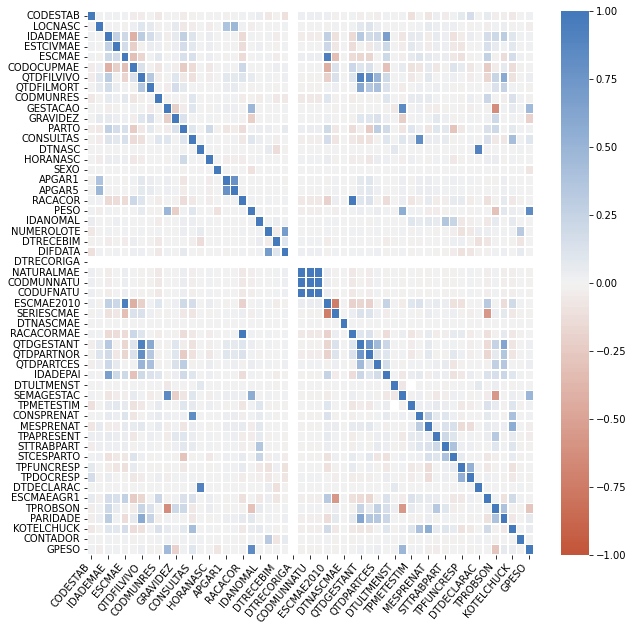

In [12]:
sinasc19['PESO'] = sinasc19['PESO'].astype('category').cat.codes

sinasc_corr = sinasc19.corr()
corr_values = sinasc_corr['PESO'].sort_values(ascending=False)
corr_values = abs(corr_values).sort_values(ascending=False)

print('Correlação das features numéricas com o resultado em ordem crescente')
print(abs(corr_values).sort_values(ascending=False))

corr4 = sinasc19.corr()
plt.figure(figsize=(10, 10))
ax = sns.heatmap(
    corr4,
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 250, n=200),
    square=False,
    linewidths=.5
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=50,
    horizontalalignment='right'
);

In [13]:
'''sinasc19 = sinasc19.drop(columns=['STTRABPART', 'QTDFILMORT',
                                  'QTDPARTNOR', 'TPMETESTIM', 'TPDOCRESP', 'CODESTAB', 'PARTO' ], axis=1)'''


sinasc19 = sinasc19.drop(columns=['IDANOMAL', 'CONTADOR', 'IDADEPAI', 'CODMUNRES','RACACORMAE', 'RACACOR',
                                  'ESCMAE', 'ESTCIVMAE', 'DTDECLARAC', 'HORANASC',
                                  'NUMEROLOTE', 'ESCMAE2010', 'DTNASC','APGAR1', 'ESCMAEAGR1',
                                  'CODOCUPMAE', 'DIFDATA', 'STCESPARTO', 'TPFUNCRESP',
                                  'DTNASCMAE', 'DTRECEBIM', 'APGAR5', 'DTULTMENST', 'DTRECORIGA'], axis=1)

'''
sinasc19 = sinasc19.drop(columns=['DTRECORIGA', 'HORANASC', 'DTNASCMAE', 'IDANOMAL', 'DTRECEBIM',
                                  'STTRABPART', 'DTDECLARAC', 'DTULTMENST', 'DTNASC', 'QTDFILMORT',
                                  'QTDPARTNOR', 'CODOCUPMAE', 'CONTADOR', 'TPMETESTIM', 'ESCMAEAGR1',
                                  'ESTCIVMAE', 'IDADEPAI', 'STCESPARTO'], axis=1)

sinasc19 = sinasc19.drop(columns=['QTDPARTNOR', 'QTDFILMORT', 'STTRABPART',
                                  'TPDOCRESP', 'CODESTAB', 'TPMETESTIM', 'PARTO'], axis=1)

sinasc19 = sinasc19.drop(columns=['KOTELCHUCK', 'QTDPARTCES', 'TPAPRESENT', 'QTDGESTANT',
                                  'MESPRENAT', 'LOCNASC', 'CODMUNNATU','CODUFNATU',
                                  'NATURALMAE','CONSPRENAT', 'IDADEMAE'], axis=1)

sinasc19 = sinasc19.drop(columns=['LOCNASC', 'CODMUNNATU','CODUFNATU',
                                  'NATURALMAE','CONSPRENAT', 'IDADEMAE'], axis=1)'''

"\nsinasc19 = sinasc19.drop(columns=['DTRECORIGA', 'HORANASC', 'DTNASCMAE', 'IDANOMAL', 'DTRECEBIM',\n                                  'STTRABPART', 'DTDECLARAC', 'DTULTMENST', 'DTNASC', 'QTDFILMORT',\n                                  'QTDPARTNOR', 'CODOCUPMAE', 'CONTADOR', 'TPMETESTIM', 'ESCMAEAGR1',\n                                  'ESTCIVMAE', 'IDADEPAI', 'STCESPARTO'], axis=1)\n\nsinasc19 = sinasc19.drop(columns=['QTDPARTNOR', 'QTDFILMORT', 'STTRABPART',\n                                  'TPDOCRESP', 'CODESTAB', 'TPMETESTIM', 'PARTO'], axis=1)\n\nsinasc19 = sinasc19.drop(columns=['KOTELCHUCK', 'QTDPARTCES', 'TPAPRESENT', 'QTDGESTANT',\n                                  'MESPRENAT', 'LOCNASC', 'CODMUNNATU','CODUFNATU',\n                                  'NATURALMAE','CONSPRENAT', 'IDADEMAE'], axis=1)\n\nsinasc19 = sinasc19.drop(columns=['LOCNASC', 'CODMUNNATU','CODUFNATU',\n                                  'NATURALMAE','CONSPRENAT', 'IDADEMAE'], axis=1)"

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


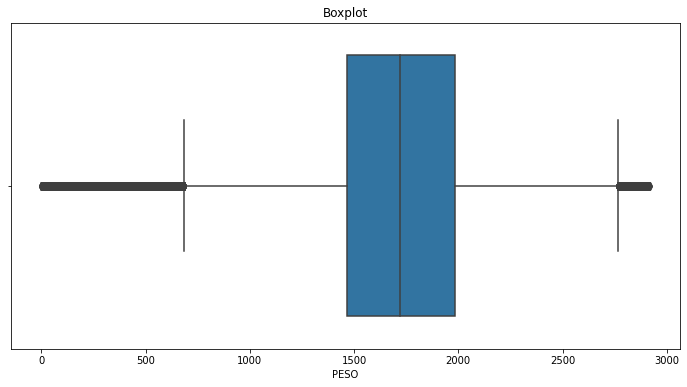

In [14]:
fig2, ax2 = plt.subplots(figsize=(12,6))
fig2 = sns.boxplot(sinasc19.PESO).set_title('Boxplot')
fig2.figure.savefig('boxplot_origin.png')

In [15]:
def outliers(s):
    iqr = (np.quantile(s, 0.65))-(np.quantile(s, 0.45))
    upper_bound = np.quantile(s, 0.65)+(1.5*iqr)
    lower_bound = np.quantile(s, 0.45)-(1.5*iqr)
    f = []
    for i in s:
        if i > upper_bound:
            f.append(i)
        elif i < lower_bound:
            f.append(i)
    sums = len(f)
    pros = len(f)/len(s)*100
    d = {'IQR':iqr,
         'Upper Bound':upper_bound,
        'Lower Bound':lower_bound,
        'Sum outliers': sums,'percentage outliers':pros}
    d = pd.DataFrame(d.items(),columns = ['sub','values'])
    return(d)
    
outliers(sinasc19.PESO)

,sub,values
0,IQR,191.000000
1,Upper Bound,2156.500000
2,Lower Bound,1392.500000
3,Sum outliers,67623.000000
4,percentage outliers,32.512777


In [ ]:
s = sinasc19['PESO']
iqr = (np.quantile(s, 0.65))-(np.quantile(s, 0.45))
upper_bound = np.quantile(s, 0.65)+(1.5*iqr)
lower_bound = np.quantile(s, 0.45)-(1.5*iqr)

#drop outliers
sinasc19 = sinasc19[(sinasc19['PESO'] <= upper_bound)]
sinasc19 = sinasc19[(sinasc19['PESO'] <= lower_bound)]

'''# limiting outliers
sinasc19['PESO'] = np.where(sinasc19['PESO'] > upper_bound, upper_bound,sinasc19['PESO']) #higher
sinasc19['PESO'] = np.where(sinasc19['PESO'] < lower_bound, lower_bound,sinasc19['PESO']) #lower'''


fig,ax = plt.subplots(figsize=(12,6))
fig = sns.boxplot(sinasc19.PESO).set_title('Boxplot')
fig.figure.savefig('AP_drop.png')

In [16]:
sinasc19.shape

(207989, 31)

([<matplotlib.axis.XTick at 0x7f858b273ad0>,
 [Text(0, 0, 'CODESTAB'),
  Text(0, 0, 'LOCNASC'),
  Text(0, 0, 'IDADEMAE'),
  Text(0, 0, 'QTDFILVIVO'),
  Text(0, 0, 'QTDFILMORT'),
  Text(0, 0, 'GESTACAO'),
  Text(0, 0, 'GRAVIDEZ'),
  Text(0, 0, 'PARTO'),
  Text(0, 0, 'CONSULTAS'),
  Text(0, 0, 'SEXO'),
  Text(0, 0, 'PESO'),
  Text(0, 0, 'CODANOMAL'),
  Text(0, 0, 'VERSAOSIST'),
  Text(0, 0, 'NATURALMAE'),
  Text(0, 0, 'CODMUNNATU'),
  Text(0, 0, 'CODUFNATU'),
  Text(0, 0, 'SERIESCMAE'),
  Text(0, 0, 'QTDGESTANT'),
  Text(0, 0, 'QTDPARTNOR'),
  Text(0, 0, 'QTDPARTCES'),
  Text(0, 0, 'SEMAGESTAC'),
  Text(0, 0, 'TPMETESTIM'),
  Text(0, 0, 'CONSPRENAT'),
  Text(0, 0, 'MESPRENAT'),
  Text(0, 0, 'TPAPRESENT'),
  Text(0, 0, 'STTRABPART'),
  Text(0, 0, 'TPDOCRESP'),
  Text(0, 0, 'TPROBSON'),
  Text(0, 0, 'PARIDADE'),
  Text(0, 0, 'KOTELCHUCK'),
  Text(0, 0, 'GPESO')])

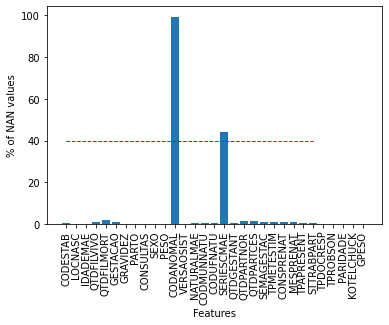

In [17]:
cat_null = sinasc19.isnull().sum()
#print(cat_null)
cat_null = cat_null/len(sinasc19)*100
cat_null = cat_null[cat_null>0]
cat_null.sort_values(inplace=True, ascending=False)
#print(cat_null)

null_cat=sinasc19.isna().sum()/len(sinasc19)*100
plt.bar(range(len(null_cat)),null_cat)
plt.xlabel('Features')
plt.ylabel('% of NAN values')
plt.plot([0, 25], [40, 40], 'r--', lw=1)
plt.xticks(list(range(len(sinasc19.columns))),list(sinasc19.columns.values),rotation='vertical')

In [18]:
for col in sinasc19.columns.values:
    if (pd.isna(sinasc19[col]).sum()) > 0: 
        if pd.isna(sinasc19[col]).sum() > (40/100 * len(sinasc19)): 
            print(col, 'removido') 
            sinasc19 = sinasc19.drop([col], axis=1) 
        elif (sinasc19[col].dtype == 'object'):
            sinasc19[col] = sinasc19[col].fillna(sinasc19[col].mode()[0])        
        else: sinasc19[col] = sinasc19[col].fillna(sinasc19[col].median())

CODANOMAL removido
SERIESCMAE removido


In [19]:
sinasc19.shape

(207989, 29)

In [20]:
sinasc19 = pd.get_dummies(sinasc19)
sinasc19.head(10).T

,0,1,2,3,4,5,6,7,8,9
CODESTAB,2365146.0,2727064.0,2561344.0,2473577.0,2654032.0,2707527.0,2336812.0,2757710.0,2703041.0,2344882.0
LOCNASC,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
IDADEMAE,26.0,29.0,27.0,18.0,30.0,25.0,32.0,20.0,32.0,26.0
QTDFILVIVO,1.0,0.0,4.0,1.0,0.0,0.0,2.0,1.0,3.0,1.0
QTDFILMORT,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
GESTACAO,5.0,4.0,5.0,5.0,5.0,5.0,5.0,5.0,4.0,5.0
GRAVIDEZ,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
PARTO,1.0,1.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0
CONSULTAS,4.0,4.0,4.0,4.0,4.0,4.0,3.0,4.0,3.0,3.0
SEXO,2.0,1.0,2.0,2.0,2.0,1.0,2.0,1.0,1.0,1.0


In [21]:
# recupera os valores (X), e as classes (Y)
X = sinasc19.drop('GPESO', axis=1)
Y = sinasc19['GPESO']
 
# dividir o dataset entre treino e teste
# X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=26)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state = 1, stratify=Y)

In [22]:
# stochastic gradient descent (SGD)
sgd1 = linear_model.SGDClassifier(max_iter=5, tol=None)

sgd1.fit(X_train, Y_train)
Y_pred1 = sgd1.predict(X_test)

acc_sgd1 = round(sgd1.score(X_train, Y_train) * 100, 2)

print(round(acc_sgd1,2,), "%")
print(classification_report(Y_test, Y_pred1))
print(pd.crosstab(Y_test, Y_pred1, rownames=['Real'], colnames=['Predito'], margins=True))

61.23 %
              precision    recall  f1-score   support

           1       0.00      0.00      0.00       789
           2       0.00      0.00      0.00      1369
           3       0.34      0.03      0.06     15141
           4       0.62      0.97      0.76     32117
           5       0.00      0.00      0.00      2582

    accuracy                           0.61     51998
   macro avg       0.19      0.20      0.16     51998
weighted avg       0.48      0.61      0.48     51998

Predito     3      4    All
Real                       
1          36    753    789
2          83   1286   1369
3         490  14651  15141
4         847  31270  32117
5           2   2580   2582
All      1458  50540  51998


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [23]:
# Gaussian Naive Bayes
gaussian1 = GaussianNB()

gaussian1.fit(X_train, Y_train)
Y_pred2 = gaussian1.predict(X_test)

acc_gaussian1 = round(gaussian1.score(X_train, Y_train) * 100, 2)

print(round(acc_gaussian1,2,), "%")
print(pd.crosstab(Y_test, Y_pred2, rownames=['Real'], colnames=['Predito'], margins=True))
print(classification_report(Y_test, Y_pred2))

96.86 %
Predito    1     2      3      4     5    All
Real                                         
1        296   131      1    358     3    789
2          0  1361      8      0     0   1369
3          0    31  14421    689     0  15141
4          0     0      0  32057    60  32117
5          0     0      0    317  2265   2582
All      296  1523  14430  33421  2328  51998
              precision    recall  f1-score   support

           1       1.00      0.38      0.55       789
           2       0.89      0.99      0.94      1369
           3       1.00      0.95      0.98     15141
           4       0.96      1.00      0.98     32117
           5       0.97      0.88      0.92      2582

    accuracy                           0.97     51998
   macro avg       0.97      0.84      0.87     51998
weighted avg       0.97      0.97      0.97     51998



In [24]:
# Perceptron
perceptron1 = Perceptron(max_iter=5)

perceptron1.fit(X_train, Y_train)
Y_pred3 = perceptron1.predict(X_test)

acc_perceptron1 = round(perceptron1.score(X_train, Y_train) * 100, 2)

print(round(acc_perceptron1,2,), "%")
print(pd.crosstab(Y_test, Y_pred3, rownames=['Real'], colnames=['Predito'], margins=True))
print(classification_report(Y_test, Y_pred3))

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:700: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


62.01 %
Predito    3      4   5    All
Real                          
1         29    760   0    789
2         81   1288   0   1369
3        134  15004   3  15141
4          0  32106  11  32117
5          0   2582   0   2582
All      244  51740  14  51998
              precision    recall  f1-score   support

           1       0.00      0.00      0.00       789
           2       0.00      0.00      0.00      1369
           3       0.55      0.01      0.02     15141
           4       0.62      1.00      0.77     32117
           5       0.00      0.00      0.00      2582

    accuracy                           0.62     51998
   macro avg       0.23      0.20      0.16     51998
weighted avg       0.54      0.62      0.48     51998



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [37]:
# KNN
knn1 = KNeighborsClassifier(n_neighbors = 5)

knn1.fit(X_train, Y_train)
Y_pred4 = knn1.predict(X_test)

acc_knn1 = round(knn1.score(X_train, Y_train) * 100, 2)

print(round(acc_knn1,2,), "%")
print(pd.crosstab(Y_test, Y_pred4, rownames=['Real'], colnames=['Predito'], margins=True))
print(classification_report(Y_test, Y_pred4))

97.58 %
Predito    1     2      3      4     5    All
Real                                         
1        483    59    121    117     9    789
2         26  1178    141     24     0   1369
3         52    13  14453    622     1  15141
4         45     1    338  31707    26  32117
5         13     0      8    360  2201   2582
All      619  1251  15061  32830  2237  51998
              precision    recall  f1-score   support

           1       0.78      0.61      0.69       789
           2       0.94      0.86      0.90      1369
           3       0.96      0.95      0.96     15141
           4       0.97      0.99      0.98     32117
           5       0.98      0.85      0.91      2582

    accuracy                           0.96     51998
   macro avg       0.93      0.85      0.89     51998
weighted avg       0.96      0.96      0.96     51998



In [25]:
# Logistic Regression
lr1 = LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

lr1.fit(X_train, Y_train)
Y_pred5 = lr1.predict(X_test)

acc_log1 = round(lr1.score(X_train, Y_train) * 100, 2)

print(round(acc_log1,2,), "%")
print(pd.crosstab(Y_test, Y_pred5, rownames=['Real'], colnames=['Predito'], margins=True))
print(classification_report(Y_test, Y_pred5))

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


72.66 %
Predito   2     3      4    All
Real                           
1         2   428    359    789
2         9  1358      2   1369
3        20  5766   9355  15141
4        14    83  32020  32117
5         0     0   2582   2582
All      45  7635  44318  51998
              precision    recall  f1-score   support

           1       0.00      0.00      0.00       789
           2       0.20      0.01      0.01      1369
           3       0.76      0.38      0.51     15141
           4       0.72      1.00      0.84     32117
           5       0.00      0.00      0.00      2582

    accuracy                           0.73     51998
   macro avg       0.34      0.28      0.27     51998
weighted avg       0.67      0.73      0.67     51998



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [38]:
# SVM
linear_svc1 = LinearSVC()

linear_svc1.fit(X_train, Y_train)
Y_pred6 = linear_svc1.predict(X_test)

acc_linear_svc1 = round(linear_svc1.score(X_train, Y_train) * 100, 2)

print(round(acc_linear_svc1,2,), "%")
print(pd.crosstab(Y_test, Y_pred6, rownames=['Real'], colnames=['Predito'], margins=True))
print(classification_report(Y_test, Y_pred6))

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


58.56 %
Predito    2      3      4    All
Real                             
1         29    516    244    789
2         84   1285      0   1369
3        190  10409   4542  15141
4          0  12051  20066  32117
5          0    216   2366   2582
All      303  24477  27218  51998
              precision    recall  f1-score   support

           1       0.00      0.00      0.00       789
           2       0.28      0.06      0.10      1369
           3       0.43      0.69      0.53     15141
           4       0.74      0.62      0.68     32117
           5       0.00      0.00      0.00      2582

    accuracy                           0.59     51998
   macro avg       0.29      0.27      0.26     51998
weighted avg       0.59      0.59      0.57     51998



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [26]:
# Decision Tree
decision_tree1 = DecisionTreeClassifier()

decision_tree1.fit(X_train, Y_train)
Y_pred7 = decision_tree1.predict(X_test)

acc_decision_tree1 = round(decision_tree1.score(X_train, Y_train) * 100, 2)

print(round(acc_decision_tree1,2,), "%")
print(pd.crosstab(Y_test, Y_pred7, rownames=['Real'], colnames=['Predito'], margins=True))
print(classification_report(Y_test, Y_pred7))

100.0 %
Predito    1     2      3      4     5    All
Real                                         
1        789     0      0      0     0    789
2          0  1369      0      0     0   1369
3          0     0  15141      0     0  15141
4          0     0      0  32117     0  32117
5          0     0      0      0  2582   2582
All      789  1369  15141  32117  2582  51998
              precision    recall  f1-score   support

           1       1.00      1.00      1.00       789
           2       1.00      1.00      1.00      1369
           3       1.00      1.00      1.00     15141
           4       1.00      1.00      1.00     32117
           5       1.00      1.00      1.00      2582

    accuracy                           1.00     51998
   macro avg       1.00      1.00      1.00     51998
weighted avg       1.00      1.00      1.00     51998



In [27]:
# Random Forest
random_forest1 = RandomForestClassifier(n_estimators=100)

random_forest1.fit(X_train, Y_train)
Y_pred8 = random_forest1.predict(X_test)

acc_random_forest1 = round(random_forest1.score(X_train, Y_train) * 100, 2)

print(round(acc_random_forest1,2,), "%")
print(pd.crosstab(Y_test, Y_pred8, rownames=['Real'], colnames=['Predito'], margins=True))
print(classification_report(Y_test, Y_pred8))

100.0 %
Predito    1     2      3      4     5    All
Real                                         
1        725    37     21      0     6    789
2          1  1368      0      0     0   1369
3          0     0  15141      0     0  15141
4          0     0      0  32117     0  32117
5          0     0      0      0  2582   2582
All      726  1405  15162  32117  2588  51998
              precision    recall  f1-score   support

           1       1.00      0.92      0.96       789
           2       0.97      1.00      0.99      1369
           3       1.00      1.00      1.00     15141
           4       1.00      1.00      1.00     32117
           5       1.00      1.00      1.00      2582

    accuracy                           1.00     51998
   macro avg       0.99      0.98      0.99     51998
weighted avg       1.00      1.00      1.00     51998



In [39]:
# Ranking final do percentual de acurácia dos modelos aplicados
results = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent', 
              'Decision Tree'],
    'Score': [acc_linear_svc1, acc_knn1, acc_log1, 
              acc_random_forest1, acc_gaussian1, acc_perceptron1, 
              acc_sgd1, acc_decision_tree1]})
result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df.head(9)

,Model
Score,
100.00,Random Forest
100.00,Decision Tree
97.58,KNN
96.86,Naive Bayes
72.66,Logistic Regression
62.01,Perceptron
61.23,Stochastic Gradient Decent
58.56,Support Vector Machines


### Balanceamento

4    128467
3     60562
5     10327
2      5476
1      3157
Name: GPESO, dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


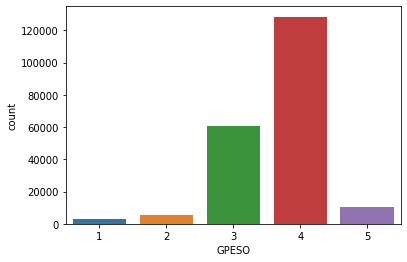

In [28]:
print(sinasc19.GPESO.value_counts())
sns.countplot('GPESO', data=sinasc19);

In [29]:
rus = RandomUnderSampler()

5    3157
4    3157
3    3157
2    3157
1    3157
Name: GPESO, dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


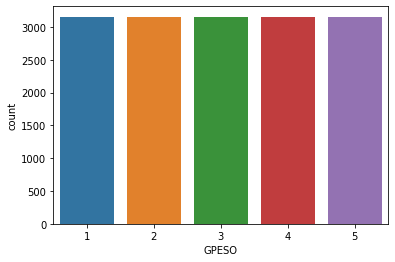

In [30]:
X_res, Y_res = rus.fit_resample(X, Y)
print(pd.Series(Y_res).value_counts())
sns.countplot(Y_res)

### SGD

In [31]:
# stochastic gradient descent (SGD)
sgd2 = linear_model.SGDClassifier(max_iter=5, tol=None)

sgd2.fit(X_res, Y_res)
Y_pred_1 = sgd2.predict(X_test)

#sgd.score(X_train, Y_train)
acc_sgd2 = round(sgd2.score(X_res, Y_res) * 100, 2)

print(round(acc_sgd2,2,), "%")
print(classification_report(Y_test, Y_pred_1))
print(pd.crosstab(Y_test, Y_pred_1, rownames=['Real'], colnames=['Predito'], margins=True))

20.0 %
              precision    recall  f1-score   support

           1       0.02      1.00      0.03       789
           2       0.00      0.00      0.00      1369
           3       0.00      0.00      0.00     15141
           4       0.00      0.00      0.00     32117
           5       0.00      0.00      0.00      2582

    accuracy                           0.02     51998
   macro avg       0.00      0.20      0.01     51998
weighted avg       0.00      0.02      0.00     51998

Predito      1    All
Real                 
1          789    789
2         1369   1369
3        15141  15141
4        32117  32117
5         2582   2582
All      51998  51998


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Naive Bayes

In [32]:
# Gaussian Naive Bayes
gaussian2 = GaussianNB()

gaussian2.fit(X_res, Y_res)
Y_pred_2 = gaussian2.predict(X_test)

acc_gaussian2 = round(gaussian2.score(X_res, Y_res) * 100, 2)

print(round(acc_gaussian2,2,), "%")
print(pd.crosstab(Y_test, Y_pred_2, rownames=['Real'], colnames=['Predito'], margins=True))
print(classification_report(Y_test, Y_pred_2))

85.44 %
Predito     1     2      3      4     5    All
Real                                          
1         371    57    299      1    61    789
2           0  1369      0      0     0   1369
3         728   391  14018      4     0  15141
4           0     0   1720  28383  2014  32117
5           0     0      0      0  2582   2582
All      1099  1817  16037  28388  4657  51998
              precision    recall  f1-score   support

           1       0.34      0.47      0.39       789
           2       0.75      1.00      0.86      1369
           3       0.87      0.93      0.90     15141
           4       1.00      0.88      0.94     32117
           5       0.55      1.00      0.71      2582

    accuracy                           0.90     51998
   macro avg       0.70      0.86      0.76     51998
weighted avg       0.92      0.90      0.91     51998



### Perceptron

In [33]:
# Perceptron
perceptron2 = Perceptron(max_iter=5)

perceptron2.fit(X_res, Y_res)
Y_pred_3 = perceptron2.predict(X_test)

acc_perceptron2 = round(perceptron2.score(X_res, Y_res) * 100, 2)

print(round(acc_perceptron2,2,), "%")
print(pd.crosstab(Y_test, Y_pred_3, rownames=['Real'], colnames=['Predito'], margins=True))
print(classification_report(Y_test, Y_pred_3))

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:700: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


20.43 %
Predito      1      3    All
Real                        
1          477    312    789
2          781    588   1369
3         8535   6606  15141
4        17642  14475  32117
5         1365   1217   2582
All      28800  23198  51998
              precision    recall  f1-score   support

           1       0.02      0.60      0.03       789
           2       0.00      0.00      0.00      1369
           3       0.28      0.44      0.34     15141
           4       0.00      0.00      0.00     32117
           5       0.00      0.00      0.00      2582

    accuracy                           0.14     51998
   macro avg       0.06      0.21      0.08     51998
weighted avg       0.08      0.14      0.10     51998



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### KNN Regressor

In [40]:
# KNN
knn2 = KNeighborsClassifier(n_neighbors = 5)

knn2.fit(X_res, Y_res)
Y_pred_4 = knn2.predict(X_test)

acc_knn2 = round(knn2.score(X_res, Y_res) * 100, 2)

print(round(acc_knn2,2,), "%")
print(pd.crosstab(Y_test, Y_pred_4, rownames=['Real'], colnames=['Predito'], margins=True))
print(classification_report(Y_test, Y_pred_4))

89.37 %
Predito     1     2      3      4     5    All
Real                                          
1         680    52     14     12    31    789
2          52  1271     23     14     9   1369
3        1682   692  12238    366   163  15141
4        3356   385   1302  25645  1429  32117
5          68    24     58    104  2328   2582
All      5838  2424  13635  26141  3960  51998
              precision    recall  f1-score   support

           1       0.12      0.86      0.21       789
           2       0.52      0.93      0.67      1369
           3       0.90      0.81      0.85     15141
           4       0.98      0.80      0.88     32117
           5       0.59      0.90      0.71      2582

    accuracy                           0.81     51998
   macro avg       0.62      0.86      0.66     51998
weighted avg       0.91      0.81      0.85     51998



### Logistic Regressor

In [43]:
# Logistic Regression
lr2 = LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

lr2.fit(X_res, Y_res)
Y_pred2 = lr2.predict(X_test)

acc_log2 = round(lr2.score(X_res, Y_res) * 100, 2)
print(round(acc_log2,2,), "%")
print(classification_report(Y_test, Y_pred2))
print(pd.crosstab(Y_test, Y_pred2, rownames=['Real'], colnames=['Predito'], margins=True))

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


61.62 %
              precision    recall  f1-score   support

           1       0.01      0.03      0.01       789
           2       0.70      0.71      0.70      1369
           3       0.58      0.72      0.64     15141
           4       0.97      0.65      0.78     32117
           5       0.39      0.99      0.56      2582

    accuracy                           0.68     51998
   macro avg       0.53      0.62      0.54     51998
weighted avg       0.81      0.68      0.71     51998

Predito     1     2      3      4     5    All
Real                                          
1          27   401    270     23    68    789
2         387   972      7      3     0   1369
3        3644    22  10865    516    94  15141
4          55     0   7421  20811  3830  32117
5           0     0     12     16  2554   2582
All      4113  1395  18575  21369  6546  51998


### SVM

In [41]:
# SVM
linear_svc2 = LinearSVC()

linear_svc2.fit(X_res, Y_res)
Y_pred_6 = linear_svc2.predict(X_test)

acc_linear_svc2 = round(linear_svc2.score(X_res, Y_res) * 100, 2)

print(round(acc_linear_svc2,2,), "%")
print(pd.crosstab(Y_test, Y_pred_6, rownames=['Real'], colnames=['Predito'], margins=True))
print(classification_report(Y_test, Y_pred_6))

21.31 %
Predito     1   2      4    5    All
Real                                
1          42  81    666    0    789
2          88   0   1281    0   1369
3         533   0  14606    2  15141
4         946   0  31027  144  32117
5          90   0   2363  129   2582
All      1699  81  49943  275  51998
              precision    recall  f1-score   support

           1       0.02      0.05      0.03       789
           2       0.00      0.00      0.00      1369
           3       0.00      0.00      0.00     15141
           4       0.62      0.97      0.76     32117
           5       0.47      0.05      0.09      2582

    accuracy                           0.60     51998
   macro avg       0.22      0.21      0.18     51998
weighted avg       0.41      0.60      0.47     51998



/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `

### Decision Tree

In [35]:
# Decision Tree
decision_tree2 = DecisionTreeClassifier()

decision_tree2.fit(X_res, Y_res)
Y_pred_7 = decision_tree2.predict(X_test)

acc_decision_tree2 = round(decision_tree2.score(X_res, Y_res) * 100, 2)

print(round(acc_decision_tree2,2,), "%")
print(pd.crosstab(Y_test, Y_pred_7, rownames=['Real'], colnames=['Predito'], margins=True))
print(classification_report(Y_test, Y_pred_7))

100.0 %
Predito    1     2      3      4     5    All
Real                                         
1        789     0      0      0     0    789
2          0  1369      0      0     0   1369
3          4     0  15137      0     0  15141
4          0     0      0  32117     0  32117
5          0     0      0      0  2582   2582
All      793  1369  15137  32117  2582  51998
              precision    recall  f1-score   support

           1       0.99      1.00      1.00       789
           2       1.00      1.00      1.00      1369
           3       1.00      1.00      1.00     15141
           4       1.00      1.00      1.00     32117
           5       1.00      1.00      1.00      2582

    accuracy                           1.00     51998
   macro avg       1.00      1.00      1.00     51998
weighted avg       1.00      1.00      1.00     51998



### Randomm Forest

In [36]:
# Random Forest
random_forest2 = RandomForestClassifier(n_estimators=100)

random_forest2.fit(X_res, Y_res)
Y_pred_8 = random_forest2.predict(X_test)

#random_forest.score(X_train, Y_train)
acc_random_forest2 = round(random_forest2.score(X_res, Y_res) * 100, 2)

print(round(acc_random_forest2,2,), "%")
print(pd.crosstab(Y_test, Y_pred_8, rownames=['Real'], colnames=['Predito'], margins=True))
print(classification_report(Y_test, Y_pred_8))

100.0 %
Predito    1     2      3      4     5    All
Real                                         
1        789     0      0      0     0    789
2          3  1356     10      0     0   1369
3         17    23  15101      0     0  15141
4         38    23    159  31897     0  32117
5          2     2      0      0  2578   2582
All      849  1404  15270  31897  2578  51998
              precision    recall  f1-score   support

           1       0.93      1.00      0.96       789
           2       0.97      0.99      0.98      1369
           3       0.99      1.00      0.99     15141
           4       1.00      0.99      1.00     32117
           5       1.00      1.00      1.00      2582

    accuracy                           0.99     51998
   macro avg       0.98      1.00      0.99     51998
weighted avg       0.99      0.99      0.99     51998



## Resultados

In [45]:
# Ranking final do percentual de acurácia dos modelos aplicados
results = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent', 
              'Decision Tree'],
    'Score': [acc_linear_svc2, acc_knn2, acc_log2, 
              acc_random_forest2, acc_gaussian2, acc_perceptron2, 
              acc_sgd2, acc_decision_tree2]})
result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df.head(9)

,Model
Score,
100.00,Random Forest
100.00,Decision Tree
89.37,KNN
85.44,Naive Bayes
61.62,Logistic Regression
21.31,Support Vector Machines
20.43,Perceptron
20.00,Stochastic Gradient Decent
